In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Datasets for the 5 cities

In [2]:



A_data=pd.read_csv("nizamabad_hw.csv")

print("The dataset for the required city is:")
A_data

The dataset for the required city is:


,YEAR,MO,DY,T2M,QV2M
0,2016,1,1,23.94,6.16
1,2016,1,2,23.91,5.43
2,2016,1,3,23.14,4.27
3,2016,1,4,22.00,5.37
4,2016,1,5,22.32,5.13
...,...,...,...,...,...
2552,2022,12,27,23.85,15.44
2553,2022,12,28,23.44,14.40
2554,2022,12,29,22.03,11.60
2555,2022,12,30,22.63,11.17


In [3]:
'''Function to predict heat wave
        0-No heat wave
        1-Mild heat wave
        2-Intense heat wave'''

def Heat_wave_pred(df):
    L=[]
    mean=df.mean()
    for i in df:
        if i-mean>=4.5 and i-mean<6.4:
            L.append(1)
        elif i-mean>6.4:
            L.append(2)
        elif i>=45:
            L.append(1)
        elif i>=47:
            L.append(2)
        else:
            L.append(0)
    return L
#A_data["HWP"]=Heat_wave_pred(A_data["T2M"])

In [4]:
#Converting the year month and day columns to datetime data type

L=[]
l=[]
for i in range(2557):
    L.append(str(A_data["DY"][i])+"  "+str(A_data["MO"][i])+"  "+str(A_data["YEAR"][i]))
    l.append(i)
A_data["Date"]=L
A_data["Index"]=l
A_data['Date'] =  A_data["Date"].apply(pd.to_datetime,infer_datetime_format=True)
A_data["Date"]

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
2552   2022-12-27
2553   2022-12-28
2554   2022-12-29
2555   2022-12-30
2556   2022-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [5]:
A_data_test=A_data[["Date","T2M"]]
A_data_test.set_index("Date",inplace=True)
A_data_test

,T2M
Date,
2016-01-01,23.94
2016-02-01,23.91
2016-03-01,23.14
2016-04-01,22.00
2016-05-01,22.32
...,...
2022-12-27,23.85
2022-12-28,23.44
2022-12-29,22.03


# Printing the dataset

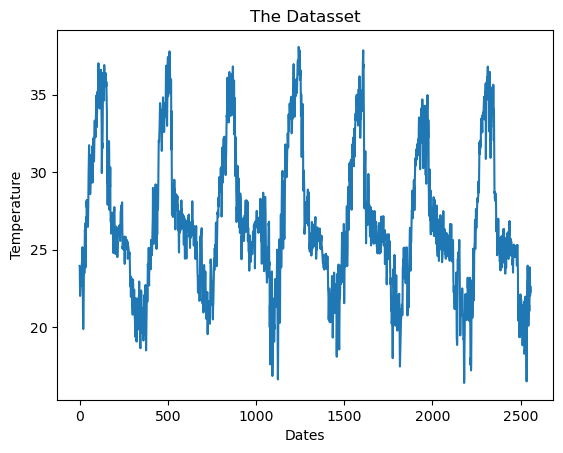

In [6]:
plt.title("The Datasset")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(np.array(A_data["Index"]),np.array(A_data["T2M"]))

# Splitting in test adn training dataset

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
train=A_data_test.iloc[:-30]
test=A_data_test.iloc[-30:]

In [8]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(A_data_test)
print("The p-value of the dataset is:",dfa[1])

The p-value of the dataset is: 0.01662881424918067


In [9]:
#pip install pmdarima

In [10]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(A_data_test["T2M"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6471.366, Time=4.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6638.989, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6602.474, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6590.898, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6636.990, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6576.423, Time=5.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6470.375, Time=2.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6584.441, Time=1.52 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6551.792, Time=0.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6471.553, Time=3.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6520.200, Time=0.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6473.249, Time=5.53 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6468.376, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6582.442, Time=0.57 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3230.188
Date:                Sat, 04 Mar 2023   AIC                           6468.376
Time:                        18:56:08   BIC                           6491.761
Sample:                             0   HQIC                          6476.857
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8599      0.037     23.191      0.000       0.787       0.933
ar.L2         -0.2415      0.015    -15.819      0.000      -0.271      -0.212
ma.L1         -0.7582      0.035    -21.581      0.000      -0.827      -0.689
sigma2         0.7331      0.014     52.743      0.000       0.706       0.760
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               841.37
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.71
Prob(H) (two-sided):                  0.69   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The training data is:


,T2M
Date,
2016-01-01,23.94
2016-02-01,23.91
2016-03-01,23.14
2016-04-01,22.00
2016-05-01,22.32
...,...
2022-11-27,18.26
2022-11-28,18.49
2022-11-29,18.37


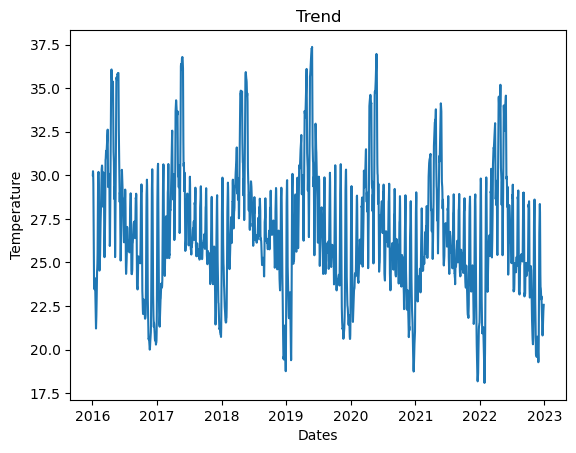

In [11]:
A_data_test.sort_index(inplace=True)
decompose = seasonal_decompose(A_data_test)
trend=decompose.trend
seasonal=decompose.seasonal
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Trend")
plt.plot(trend)
print("The training data is:")
train

In [12]:
from statsmodels.tsa.arima.model import ARIMA 
model =ARIMA(train,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2527
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3213.454
Date:                          Sat, 04 Mar 2023   AIC                           6438.909
Time:                                  19:00:02   BIC                           6473.844
Sample:                                       0   HQIC                          6451.593
                                         - 2527                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8496      0.039     22.049      0.000       0.774       0.925
ar.L2         -0.2320      0.016    -14.558      0.000      -0.263      -0.201
ma.L1         -0.7563      0.036    -20.756      0.000      -0.828      -0.685
ar.S.L30       0.0338      0.021      1.627      0.104      -0.007       0.075
ma.S.L30      -0.9993      0.279     -3.588      0.000      -1.545      -0.453
sigma2         0.7299      0.200      3.658      0.000       0.339       1.121
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               723.80
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.70
Prob(H) (two-sided):                  0.97   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Predicted values for the month of December 2022')

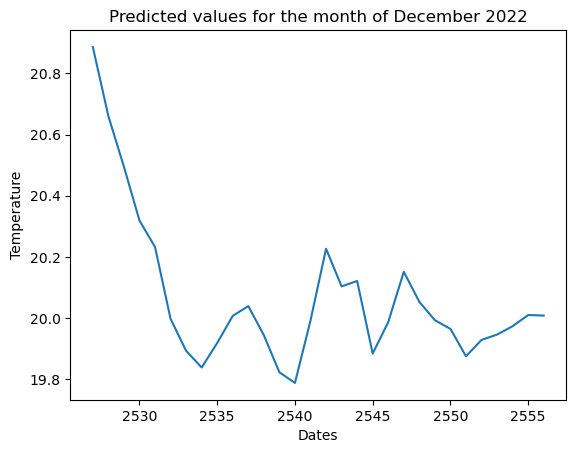

In [13]:
starts=len(train)
ends=len(train)+len(test)-1
pred=model_fit.predict(start=starts,end=ends,typ='levels')
plt.plot(pred)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Predicted values for the month of December 2022")

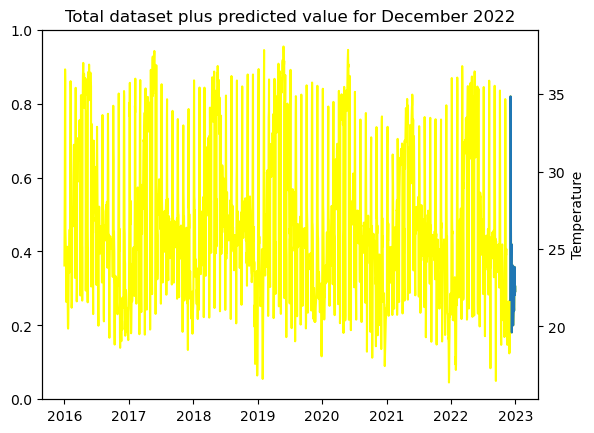

In [14]:
res=pd.DataFrame(pred)
res.columns=["T2M"]
final_data =pd.DataFrame(train)
pred_data=final_data.append(res)
fig,ax1=plt.subplots()
ax2=ax1.twinx()
#curve1=ax1.plot(pred_data,label='predicted Temp',color='black')
curve2=ax2.plot(A_data_test,label="Actual Temp",color='yellow')
plt.plot(A_data_test[-30:])
#plt.plot(pred)
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Total dataset plus predicted value for December 2022")
plt.plot()
plt.show()

# Performance of the model

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
L=[]
for i in pred:
    L.append(i)
l=list(test["T2M"])
rmse=sqrt(mean_squared_error(pred,test["T2M"]))
ame=mean_absolute_error(pred,test["T2M"])
print("Average Temperature         : ",A_data_test['T2M'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  26.80903793508043
Root mean Square value      :  2.2878047595738638
Mean absolute Error         :  1.9129466434830211


# Forecasting for the year 2023

# Predictions for January

In [17]:
#Since Jan has 31 days we use 31 in seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. Jan 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2557
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5795.024
Date:                          Sat, 04 Mar 2023   AIC                          11602.049
Time:                                  19:37:18   BIC                          11637.053
Sample:                              01-01-2016   HQIC                         11614.750
                                   - 12-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7133      0.016     43.798      0.000       0.681       0.745
ar.L2          0.0110      0.016      0.675      0.499      -0.021       0.043
ma.L1         -0.9986      0.004   -259.344      0.000      -1.006      -0.991
ar.S.L31       0.5245      0.017     30.334      0.000       0.491       0.558
ma.S.L31      -0.9985      0.189     -5.283      0.000      -1.369      -0.628
sigma2         5.5301      1.014      5.453      0.000       3.543       7.518
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4151.48
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.08
Prob(H) (two-sided):                  0.32   Kurtosis:                         9.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of Jan 2023 is:",pred_new)

The predicted Temperature values of each day of Jan 2023 is: 2023-01-01    23.761983
2023-01-02    23.794026
2023-01-03    27.344383
2023-01-04    30.432880
2023-01-05    29.353168
2023-01-06    27.223216
2023-01-07    24.845540
2023-01-08    25.430179
2023-01-09    25.753175
2023-01-10    25.748180
2023-01-11    22.549429
2023-01-12    24.376936
2023-01-13    24.542181
2023-01-14    24.642180
2023-01-15    24.716965
2023-01-16    24.673218
2023-01-17    24.429983
2023-01-18    23.034330
2023-01-19    22.669035
2023-01-20    23.062090
2023-01-21    23.183500
2023-01-22    23.085621
2023-01-23    22.983225
2023-01-24    22.759786
2023-01-25    22.814839
2023-01-26    23.777729
2023-01-27    24.641636
2023-01-28    24.355602
2023-01-29    23.564780
2023-01-30    23.876157
2023-01-31    23.728925
Freq: D, Name: predicted_mean, dtype: float64


In [19]:
#Combining the pred Jan2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

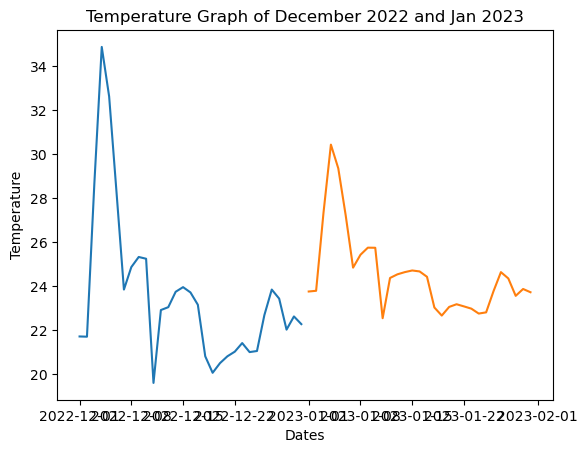

In [20]:
plt.title("Temperature Graph of December 2022 and Jan 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

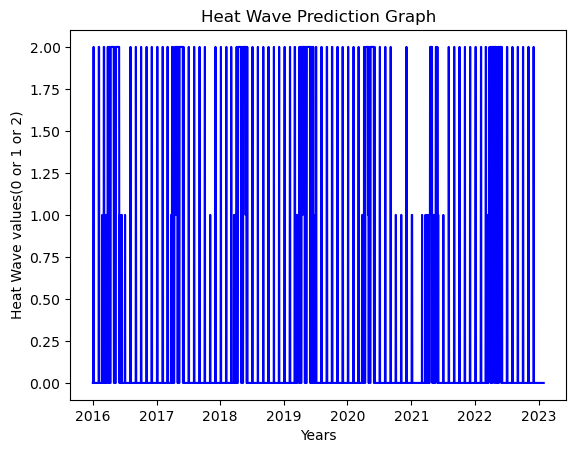

In [21]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [22]:
pred_data_Jan

,T2M,HWP
2016-01-01,23.940000,0
2016-01-02,26.080000,0
2016-01-03,28.580000,0
2016-01-04,32.760000,1
2016-01-05,36.610000,2
...,...,...
2023-01-27,24.641636,0
2023-01-28,24.355602,0
2023-01-29,23.564780,0
2023-01-30,23.876157,0


In [23]:
#Updating the original dataset to the combined data

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-01-27,24.641636
2023-01-28,24.355602
2023-01-29,23.564780
2023-01-30,23.876157
2023-01-31,23.728925


# Predictions for February

In [24]:
#Since Feb has 28 days we use 28 in seasonal order as we need 28 outputs and we need to forecast the next 28 days ie. Feb 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,28))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2588
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 28)   Log Likelihood               -6125.695
Date:                          Sat, 04 Mar 2023   AIC                          12263.391
Time:                                  19:40:23   BIC                          12298.475
Sample:                              01-01-2016   HQIC                         12276.113
                                   - 01-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8674      0.017     50.741      0.000       0.834       0.901
ar.L2         -0.2375      0.019    -12.424      0.000      -0.275      -0.200
ma.L1         -0.9473      0.008   -115.364      0.000      -0.963      -0.931
ar.S.L28      -0.0157      0.019     -0.841      0.400      -0.052       0.021
ma.S.L28      -0.9998      0.891     -1.123      0.262      -2.745       0.746
sigma2         6.6817      5.942      1.125      0.261      -4.964      18.327
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):              2347.58
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.43
Prob(H) (two-sided):                  0.29   Kurtosis:                         7.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
pred_new =model_fit.forecast(28)
print("The predicted Temperature values of each day of Feb 2023 are:",pred_new)

The predicted Temperature values of each day of Feb 2023 are: 2023-02-01    23.852374
2023-02-02    23.509983
2023-02-03    22.848119
2023-02-04    22.808244
2023-02-05    22.758778
2023-02-06    22.345252
2023-02-07    22.279057
2023-02-08    22.269006
2023-02-09    22.004111
2023-02-10    22.272917
2023-02-11    22.475306
2023-02-12    22.596319
2023-02-13    22.801363
2023-02-14    23.078027
2023-02-15    23.450074
2023-02-16    23.651775
2023-02-17    23.708982
2023-02-18    24.007787
2023-02-19    24.070007
2023-02-20    24.288857
2023-02-21    24.489338
2023-02-22    24.460790
2023-02-23    24.451901
2023-02-24    24.634609
2023-02-25    24.707772
2023-02-26    24.544849
2023-02-27    24.166929
2023-02-28    24.115327
Freq: D, Name: predicted_mean, dtype: float64


In [26]:
#Combining the pred Feb2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

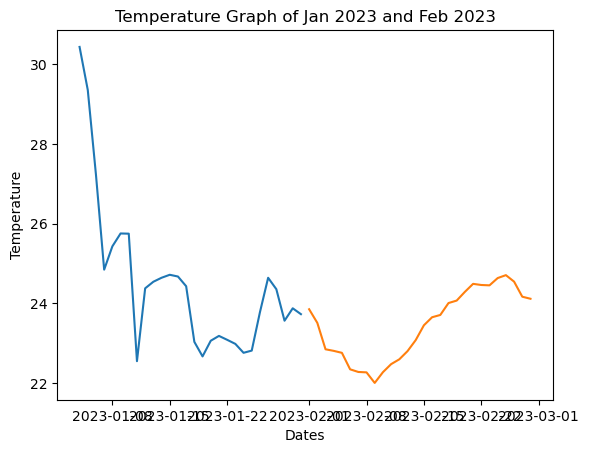

In [27]:
plt.title("Temperature Graph of Jan 2023 and Feb 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-28:])
plt.plot(pred_data[-28:])

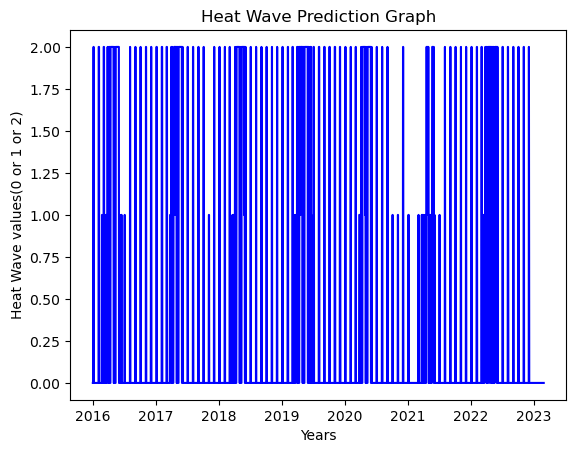

In [28]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [29]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-02-24,24.634609
2023-02-25,24.707772
2023-02-26,24.544849
2023-02-27,24.166929
2023-02-28,24.115327


# Predictions for March

In [30]:
#Since March has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. March 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2616
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5902.208
Date:                          Sat, 04 Mar 2023   AIC                          11816.417
Time:                                  19:45:02   BIC                          11851.559
Sample:                              01-01-2016   HQIC                         11829.154
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7156      0.016     44.850      0.000       0.684       0.747
ar.L2          0.0108      0.016      0.679      0.497      -0.020       0.042
ma.L1         -0.9997      0.014    -69.584      0.000      -1.028      -0.972
ar.S.L31       0.5225      0.017     31.012      0.000       0.490       0.556
ma.S.L31      -0.9997      0.884     -1.131      0.258      -2.733       0.733
sigma2         5.4039      4.751      1.137      0.255      -3.908      14.715
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4516.34
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-03-01    23.849873
2023-03-02    24.153523
2023-03-03    24.218488
2023-03-04    24.385144
2023-03-05    24.371714
2023-03-06    23.993264
2023-03-07    23.860786
2023-03-08    23.992144
2023-03-09    23.977046
2023-03-10    23.919201
2023-03-11    23.979580
2023-03-12    23.932419
2023-03-13    24.123570
2023-03-14    24.020507
2023-03-15    24.169952
2023-03-16    24.379053
2023-03-17    24.264307
2023-03-18    24.429169
2023-03-19    24.620120
2023-03-20    24.702755
2023-03-21    24.704674
2023-03-22    24.768721
2023-03-23    25.045052
2023-03-24    25.110294
2023-03-25    24.889037
2023-03-26    24.580004
2023-03-27    24.670610
2023-03-28    24.738234
2023-03-29    24.753246
2023-03-30    24.800327
2023-03-31    24.704101
Freq: D, Name: predicted_mean, dtype: float64


In [32]:
#Combining the pred March2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

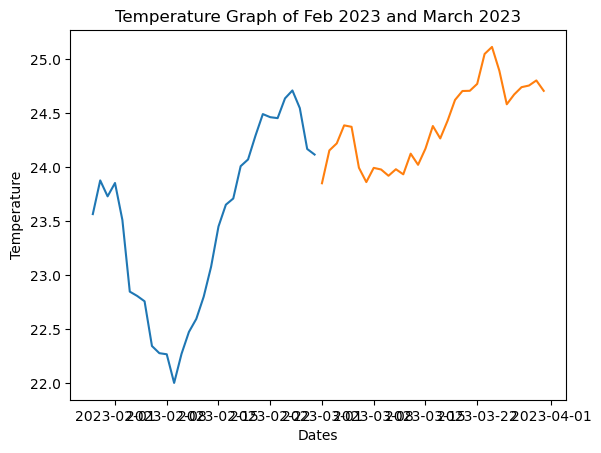

In [33]:
plt.title("Temperature Graph of Feb 2023 and March 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

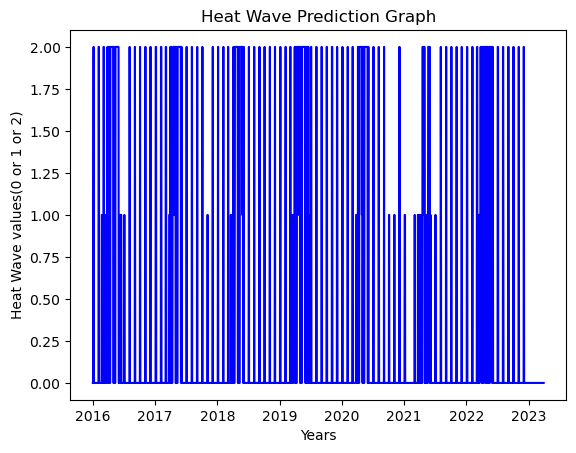

In [34]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [35]:

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-03-27,24.670610
2023-03-28,24.738234
2023-03-29,24.753246
2023-03-30,24.800327
2023-03-31,24.704101





# Predictions of April

In [36]:
#Since April has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. April 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2647
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6038.701
Date:                          Sat, 04 Mar 2023   AIC                          12089.402
Time:                                  19:49:08   BIC                          12124.618
Sample:                              01-01-2016   HQIC                         12102.158
                                   - 03-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6624      0.016     42.670      0.000       0.632       0.693
ar.L2         -0.0714      0.020     -3.634      0.000      -0.110      -0.033
ma.L1         -0.9506      0.008   -123.457      0.000      -0.966      -0.935
ar.S.L30       0.4372      0.013     32.807      0.000       0.411       0.463
ma.S.L30      -0.9999      4.325     -0.231      0.817      -9.476       7.476
sigma2         5.6834     24.575      0.231      0.817     -42.483      53.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3508.48
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.58
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of April 2023 are:",pred_new)
    

The predicted Temperature values of each day of April 2023 are: 2023-04-01    24.739366
2023-04-02    24.763905
2023-04-03    24.979155
2023-04-04    24.777151
2023-04-05    24.276166
2023-04-06    23.932534
2023-04-07    24.173364
2023-04-08    24.416866
2023-04-09    24.407207
2023-04-10    24.305071
2023-04-11    24.216240
2023-04-12    24.444286
2023-04-13    24.418885
2023-04-14    24.458819
2023-04-15    24.843269
2023-04-16    24.711329
2023-04-17    24.679228
2023-04-18    24.882334
2023-04-19    24.815743
2023-04-20    24.717209
2023-04-21    24.665316
2023-04-22    24.781132
2023-04-23    25.016375
2023-04-24    24.925785
2023-04-25    24.616600
2023-04-26    24.411469
2023-04-27    24.560165
2023-04-28    25.007321
2023-04-29    25.192321
2023-04-30    25.058894
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
#Combining the pred April2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

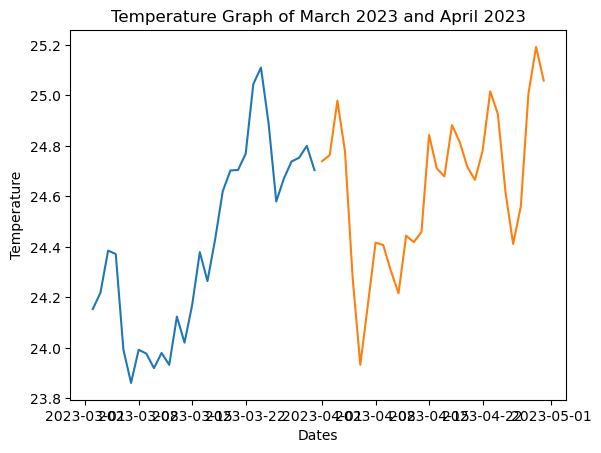

In [39]:
plt.title("Temperature Graph of March 2023 and April 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

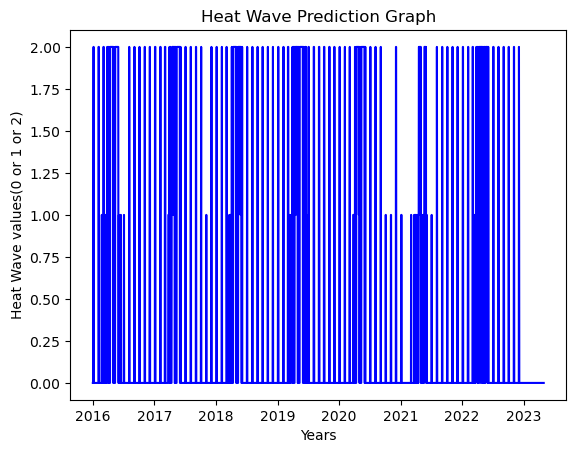

In [40]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [41]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-04-26,24.411469
2023-04-27,24.560165
2023-04-28,25.007321
2023-04-29,25.192321
2023-04-30,25.058894


# Predictions for May

In [42]:
#Since May has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. May 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2677
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6009.882
Date:                          Sat, 04 Mar 2023   AIC                          12031.764
Time:                                  19:54:09   BIC                          12067.047
Sample:                              01-01-2016   HQIC                         12044.537
                                   - 04-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7158      0.016     45.913      0.000       0.685       0.746
ar.L2          0.0107      0.015      0.689      0.491      -0.020       0.041
ma.L1         -0.9997      0.013    -77.851      0.000      -1.025      -0.974
ar.S.L31       0.5223      0.016     31.738      0.000       0.490       0.555
ma.S.L31      -0.9997      0.800     -1.249      0.212      -2.568       0.569
sigma2         5.2801      4.199      1.257      0.209      -2.950      13.510
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4942.60
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of May 2023 are:",pred_new)

The predicted Temperature values of each day of May 2023 are: 2023-05-01    24.957181
2023-05-02    24.937296
2023-05-03    24.952987
2023-05-04    25.109202
2023-05-05    25.029420
2023-05-06    24.873232
2023-05-07    24.621433
2023-05-08    24.612243
2023-05-09    24.876419
2023-05-10    25.055211
2023-05-11    24.967114
2023-05-12    24.976284
2023-05-13    25.182681
2023-05-14    25.213862
2023-05-15    25.026095
2023-05-16    25.313371
2023-05-17    25.340922
2023-05-18    25.066737
2023-05-19    25.144021
2023-05-20    25.191323
2023-05-21    25.189962
2023-05-22    25.009336
2023-05-23    25.101679
2023-05-24    25.385594
2023-05-25    25.297631
2023-05-26    24.929749
2023-05-27    24.520973
2023-05-28    24.594911
2023-05-29    24.862120
2023-05-30    25.059779
2023-05-31    25.230259
Freq: D, Name: predicted_mean, dtype: float64


In [44]:
#Combining the pred May2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

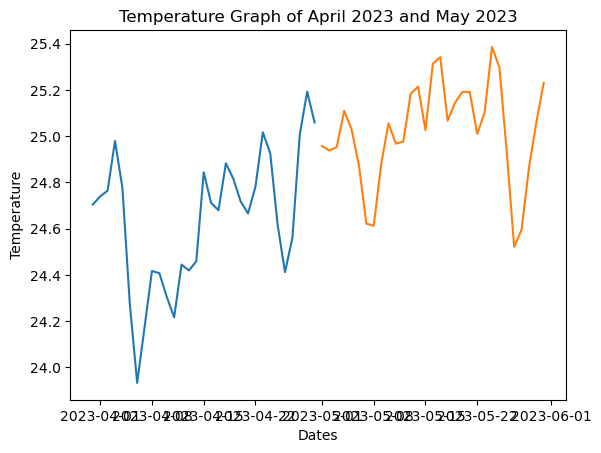

In [45]:
plt.title("Temperature Graph of April 2023 and May 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

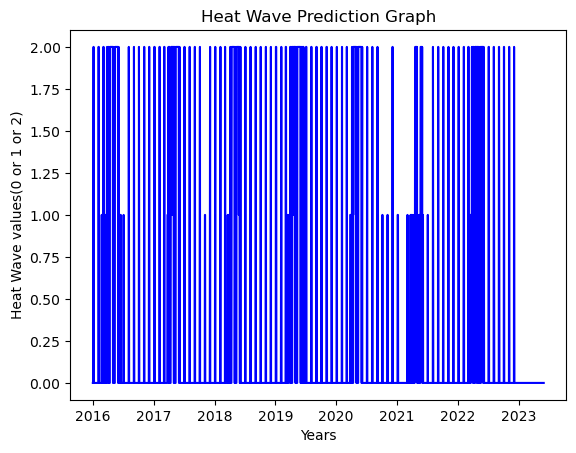

In [46]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [47]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-05-27,24.520973
2023-05-28,24.594911
2023-05-29,24.862120
2023-05-30,25.059779
2023-05-31,25.230259


# Predictions for June

In [48]:
#Since June has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. June 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2708
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6147.973
Date:                          Sat, 04 Mar 2023   AIC                          12307.946
Time:                                  19:58:07   BIC                          12343.301
Sample:                              01-01-2016   HQIC                         12320.737
                                   - 05-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6625      0.015     43.665      0.000       0.633       0.692
ar.L2         -0.0715      0.019     -3.723      0.000      -0.109      -0.034
ma.L1         -0.9506      0.008   -126.336      0.000      -0.965      -0.936
ar.S.L30       0.4370      0.013     33.553      0.000       0.411       0.462
ma.S.L30      -0.9999      4.805     -0.208      0.835     -10.418       8.418
sigma2         5.5549     26.688      0.208      0.835     -46.752      57.862
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3842.84
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-06-01    25.257584
2023-06-02    25.408741
2023-06-03    25.285551
2023-06-04    24.919859
2023-06-05    24.568593
2023-06-06    24.636023
2023-06-07    24.878169
2023-06-08    25.011967
2023-06-09    24.965320
2023-06-10    24.858783
2023-06-11    25.004766
2023-06-12    25.116787
2023-06-13    25.105427
2023-06-14    25.309460
2023-06-15    25.357837
2023-06-16    25.267228
2023-06-17    25.261817
2023-06-18    25.195092
2023-06-19    25.118412
2023-06-20    25.038995
2023-06-21    24.952589
2023-06-22    25.197375
2023-06-23    25.331047
2023-06-24    25.120839
2023-06-25    24.714853
2023-06-26    24.648993
2023-06-27    25.116011
2023-06-28    25.397505
2023-06-29    25.396276
2023-06-30    25.376647
Freq: D, Name: predicted_mean, dtype: float64


In [50]:
#Combining the pred June2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

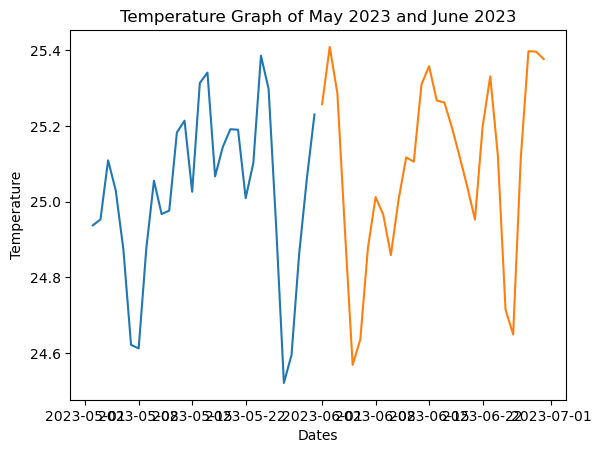

In [51]:
plt.title("Temperature Graph of May 2023 and June 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])
    

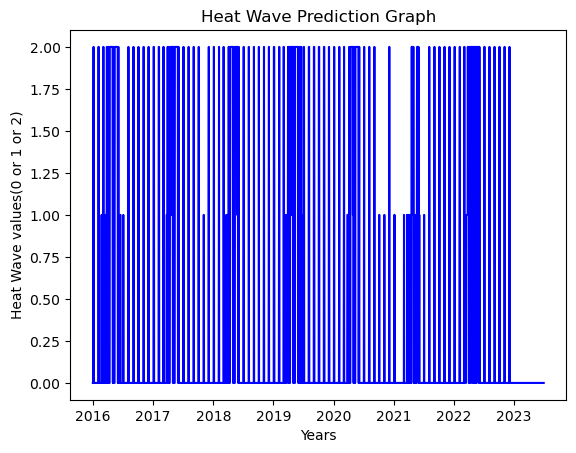

In [52]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [53]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-06-26,24.648993
2023-06-27,25.116011
2023-06-28,25.397505
2023-06-29,25.396276
2023-06-30,25.376647


# Predictions for July

In [54]:
#Since July has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. July 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2738
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6116.965
Date:                          Sat, 04 Mar 2023   AIC                          12245.930
Time:                                  20:03:43   BIC                          12281.349
Sample:                              01-01-2016   HQIC                         12258.737
                                   - 06-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7159      0.015     46.974      0.000       0.686       0.746
ar.L2          0.0105      0.015      0.692      0.489      -0.019       0.040
ma.L1         -0.9997      0.013    -79.210      0.000      -1.024      -0.975
ar.S.L31       0.5220      0.016     32.464      0.000       0.490       0.554
ma.S.L31      -0.9997      0.797     -1.254      0.210      -2.563       0.563
sigma2         5.1620      4.091      1.262      0.207      -2.856      13.180
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5389.84
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of July 2023 are:",pred_new)

The predicted Temperature values of each day of July 2023 are: 2023-07-01    25.598545
2023-07-02    25.466046
2023-07-03    25.442652
2023-07-04    25.331336
2023-07-05    25.143479
2023-07-06    24.956329
2023-07-07    25.078705
2023-07-08    25.123926
2023-07-09    25.051700
2023-07-10    25.153535
2023-07-11    25.272273
2023-07-12    25.312302
2023-07-13    25.424091
2023-07-14    25.501124
2023-07-15    25.652161
2023-07-16    25.471469
2023-07-17    25.506264
2023-07-18    25.598093
2023-07-19    25.308947
2023-07-20    25.238803
2023-07-21    25.277184
2023-07-22    25.280565
2023-07-23    25.259988
2023-07-24    25.362118
2023-07-25    25.407750
2023-07-26    25.151573
2023-07-27    24.914285
2023-07-28    24.867048
2023-07-29    25.012951
2023-07-30    25.044067
2023-07-31    25.132459
Freq: D, Name: predicted_mean, dtype: float64


In [56]:
#Combining the pred July2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

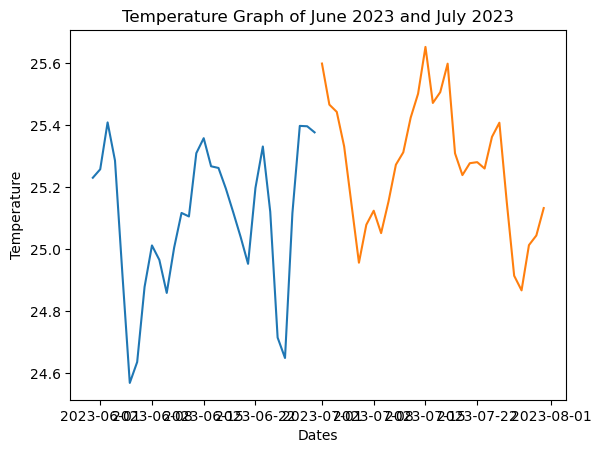

In [57]:
plt.title("Temperature Graph of June 2023 and July 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

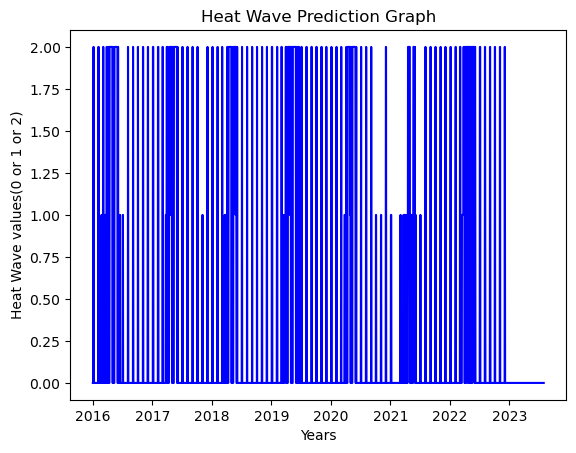

In [58]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [59]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-07-27,24.914285
2023-07-28,24.867048
2023-07-29,25.012951
2023-07-30,25.044067
2023-07-31,25.132459


# Predictions for August

In [60]:
#Since August has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. August 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2769
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6170.981
Date:                          Sat, 04 Mar 2023   AIC                          12353.962
Time:                                  20:08:30   BIC                          12389.450
Sample:                              01-01-2016   HQIC                         12366.787
                                   - 07-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7160      0.015     47.515      0.000       0.686       0.746
ar.L2          0.0104      0.015      0.696      0.486      -0.019       0.040
ma.L1         -0.9997      0.012    -80.823      0.000      -1.024      -0.975
ar.S.L31       0.5218      0.016     32.833      0.000       0.491       0.553
ma.S.L31      -0.9997      0.788     -1.269      0.204      -2.544       0.544
sigma2         5.1036      3.995      1.277      0.201      -2.727      12.934
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5630.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-08-01    25.487448
2023-08-02    25.349867
2023-08-03    25.292546
2023-08-04    25.229216
2023-08-05    25.164734
2023-08-06    25.085563
2023-08-07    25.252904
2023-08-08    25.207184
2023-08-09    25.036065
2023-08-10    25.221774
2023-08-11    25.462777
2023-08-12    25.450861
2023-08-13    25.564997
2023-08-14    25.689985
2023-08-15    25.814661
2023-08-16    25.515312
2023-08-17    25.616290
2023-08-18    25.759412
2023-08-19    25.354496
2023-08-20    25.288034
2023-08-21    25.388123
2023-08-22    25.438542
2023-08-23    25.279500
2023-08-24    25.365230
2023-08-25    25.544495
2023-08-26    25.366571
2023-08-27    25.039801
2023-08-28    24.724094
2023-08-29    24.799214
2023-08-30    24.847234
2023-08-31    24.992042
Freq: D, Name: predicted_mean, dtype: float64


In [62]:
#Combining the pred August2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

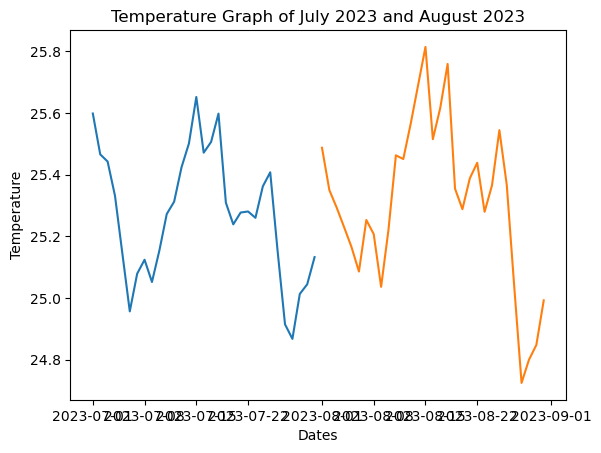

In [63]:
plt.title("Temperature Graph of July 2023 and August 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

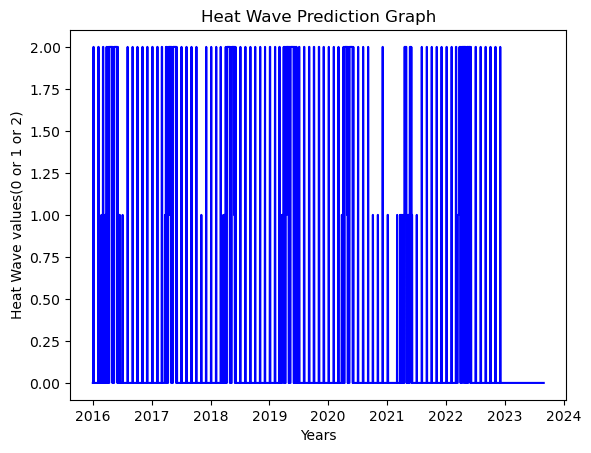

In [64]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [65]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-08-27,25.039801
2023-08-28,24.724094
2023-08-29,24.799214
2023-08-30,24.847234
2023-08-31,24.992042


# Predictions for September

In [66]:
#Since Saptember has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. September 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2800
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6311.448
Date:                          Sat, 04 Mar 2023   AIC                          12634.897
Time:                                  20:12:13   BIC                          12670.454
Sample:                              01-01-2016   HQIC                         12647.739
                                   - 08-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6628      0.015     45.181      0.000       0.634       0.692
ar.L2         -0.0718      0.019     -3.866      0.000      -0.108      -0.035
ma.L1         -0.9506      0.007   -130.766      0.000      -0.965      -0.936
ar.S.L30       0.4366      0.013     34.684      0.000       0.412       0.461
ma.S.L30      -0.9998      1.684     -0.594      0.553      -4.300       2.301
sigma2         5.3720      9.043      0.594      0.552     -12.352      23.096
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4384.53
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-09-01    24.991130
2023-09-02    24.817683
2023-09-03    24.610984
2023-09-04    24.807146
2023-09-05    25.040285
2023-09-06    25.147402
2023-09-07    25.012241
2023-09-08    24.874251
2023-09-09    25.098540
2023-09-10    25.228547
2023-09-11    25.200071
2023-09-12    25.531155
2023-09-13    25.512315
2023-09-14    25.466939
2023-09-15    25.445402
2023-09-16    25.392985
2023-09-17    25.360270
2023-09-18    25.101965
2023-09-19    25.065542
2023-09-20    25.309428
2023-09-21    25.340652
2023-09-22    25.102814
2023-09-23    24.902976
2023-09-24    25.092345
2023-09-25    25.435145
2023-09-26    25.448903
2023-09-27    25.222886
2023-09-28    25.164536
2023-09-29    25.191799
2023-09-30    25.398022
Freq: D, Name: predicted_mean, dtype: float64


In [68]:
#Combining the pred September2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

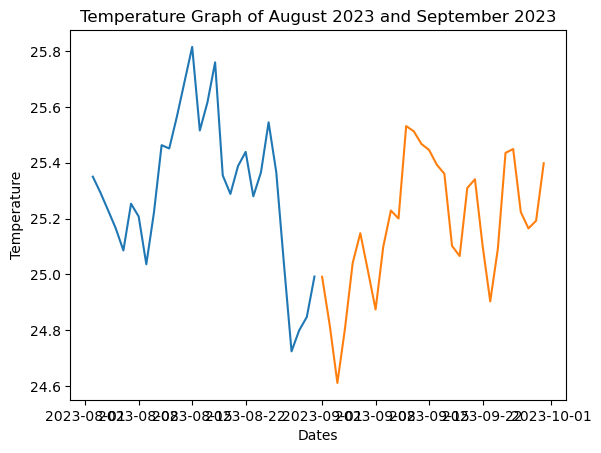

In [69]:
plt.title("Temperature Graph of August 2023 and September 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")

plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

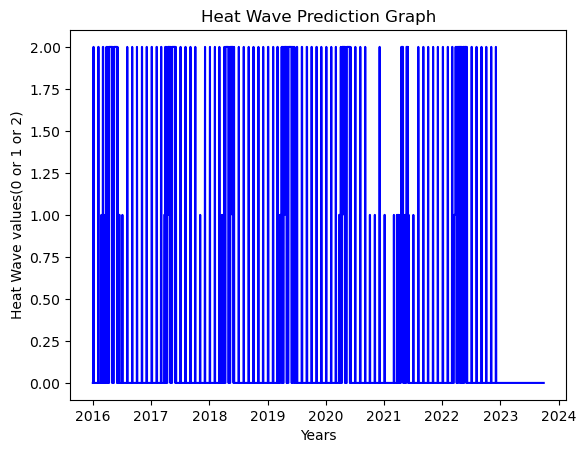

In [70]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [71]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-09-26,25.448903
2023-09-27,25.222886
2023-09-28,25.164536
2023-09-29,25.191799
2023-09-30,25.398022


# Prediction for October

In [72]:
#Since October has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. October 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2830
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6276.929
Date:                          Sat, 04 Mar 2023   AIC                          12565.857
Time:                                  20:18:00   BIC                          12601.477
Sample:                              01-01-2016   HQIC                         12578.715
                                   - 09-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7161      0.015     48.577      0.000       0.687       0.745
ar.L2          0.0103      0.015      0.704      0.481      -0.018       0.039
ma.L1         -0.9996      0.012    -86.682      0.000      -1.022      -0.977
ar.S.L31       0.5216      0.016     33.560      0.000       0.491       0.552
ma.S.L31      -0.9997      0.747     -1.339      0.181      -2.463       0.464
sigma2         4.9929      3.703      1.348      0.178      -2.266      12.252
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6120.24
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of October 2023 are:",pred_new)

The predicted Temperature values of each day of October 2023 are: 2023-10-01    25.387451
2023-10-02    25.490991
2023-10-03    25.236141
2023-10-04    25.011994
2023-10-05    25.060624
2023-10-06    25.181088
2023-10-07    25.229682
2023-10-08    25.239383
2023-10-09    25.083087
2023-10-10    25.060792
2023-10-11    25.252456
2023-10-12    25.407543
2023-10-13    25.547258
2023-10-14    25.588812
2023-10-15    25.645679
2023-10-16    25.677296
2023-10-17    25.446912
2023-10-18    25.510057
2023-10-19    25.465378
2023-10-20    25.196350
2023-10-21    25.296653
2023-10-22    25.391713
2023-10-23    25.312835
2023-10-24    25.060405
2023-10-25    25.192708
2023-10-26    25.527947
2023-10-27    25.492388
2023-10-28    25.172977
2023-10-29    24.855569
2023-10-30    24.868638
2023-10-31    25.009574
Freq: D, Name: predicted_mean, dtype: float64


In [74]:
#Combining the pred October2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

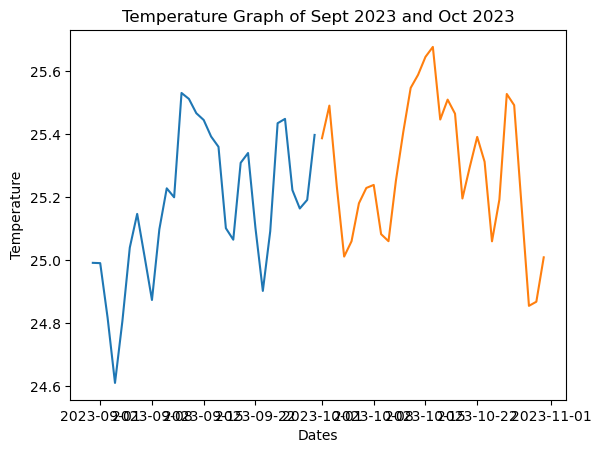

In [75]:
plt.title("Temperature Graph of Sept 2023 and Oct 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

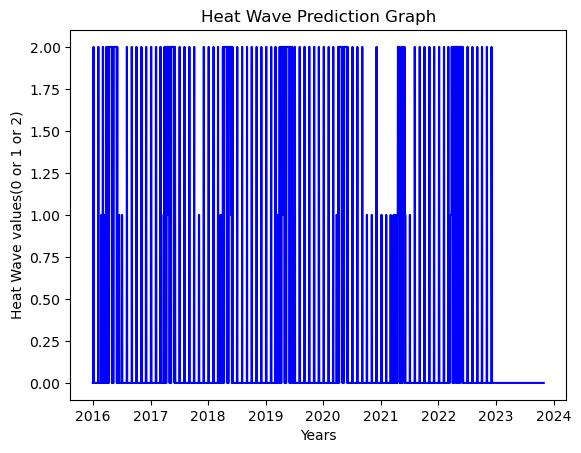

In [76]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [77]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-10-27,25.492388
2023-10-28,25.172977
2023-10-29,24.855569
2023-10-30,24.868638
2023-10-31,25.009574


# Prediction for November

In [78]:
#Since November has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. Nomvember 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2861
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6418.954
Date:                          Sat, 04 Mar 2023   AIC                          12849.908
Time:                                  20:21:53   BIC                          12885.596
Sample:                              01-01-2016   HQIC                         12862.783
                                   - 10-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6630      0.014     46.187      0.000       0.635       0.691
ar.L2         -0.0718      0.018     -3.951      0.000      -0.107      -0.036
ma.L1         -0.9506      0.007   -133.788      0.000      -0.965      -0.937
ar.S.L30       0.4363      0.012     35.432      0.000       0.412       0.460
ma.S.L30      -0.9999      1.911     -0.523      0.601      -4.744       2.745
sigma2         5.2572     10.040      0.524      0.601     -14.421      24.935
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4770.23
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of November 2023 are:",pred_new)

The predicted Temperature values of each day of November 2023 are: 2023-11-01    24.922527
2023-11-02    24.634638
2023-11-03    24.756321
2023-11-04    25.042283
2023-11-05    25.129450
2023-11-06    25.037775
2023-11-07    24.980115
2023-11-08    25.051102
2023-11-09    25.065112
2023-11-10    25.127828
2023-11-11    25.474076
2023-11-12    25.463892
2023-11-13    25.383837
2023-11-14    25.517404
2023-11-15    25.436210
2023-11-16    25.239191
2023-11-17    25.187856
2023-11-18    25.160729
2023-11-19    25.237654
2023-11-20    25.291437
2023-11-21    25.168194
2023-11-22    24.898914
2023-11-23    24.895331
2023-11-24    25.369218
2023-11-25    25.673760
2023-11-26    25.571611
2023-11-27    25.338976
2023-11-28    25.203340
2023-11-29    25.349856
2023-11-30    25.233347
Freq: D, Name: predicted_mean, dtype: float64


In [80]:
#Combining the pred November2023 data with the original dataset


res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

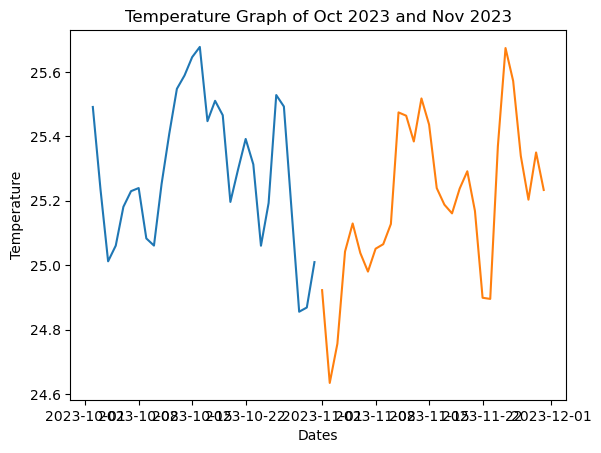

In [81]:

plt.title("Temperature Graph of Oct 2023 and Nov 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

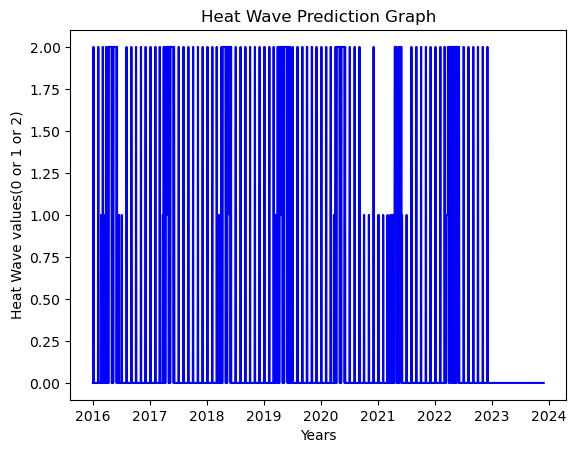

In [82]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [83]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-11-26,25.571611
2023-11-27,25.338976
2023-11-28,25.203340
2023-11-29,25.349856
2023-11-30,25.233347


# Prediction for December

In [84]:
#Since December has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. December 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2891
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6382.267
Date:                          Sat, 04 Mar 2023   AIC                          12776.533
Time:                                  20:26:05   BIC                          12812.283
Sample:                              01-01-2016   HQIC                         12789.424
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7163      0.014     49.637      0.000       0.688       0.745
ar.L2          0.0102      0.014      0.709      0.478      -0.018       0.038
ma.L1         -0.9996      0.011    -93.015      0.000      -1.021      -0.979
ar.S.L31       0.5213      0.015     34.286      0.000       0.492       0.551
ma.S.L31      -0.9997      0.707     -1.414      0.157      -2.386       0.386
sigma2         4.8873      3.432      1.424      0.154      -1.840      11.615
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6635.12
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of December 2023 are:",pred_new)

The predicted Temperature values of each day of December 2023 are: 2023-12-01    25.191429
2023-12-02    25.133183
2023-12-03    25.131906
2023-12-04    25.071414
2023-12-05    25.135934
2023-12-06    25.148152
2023-12-07    25.111691
2023-12-08    25.083835
2023-12-09    25.208440
2023-12-10    25.138755
2023-12-11    25.038358
2023-12-12    25.347006
2023-12-13    25.511132
2023-12-14    25.436712
2023-12-15    25.559525
2023-12-16    25.596588
2023-12-17    25.534656
2023-12-18    25.308033
2023-12-19    25.372995
2023-12-20    25.503545
2023-12-21    25.286259
2023-12-22    25.193658
2023-12-23    25.128009
2023-12-24    25.171354
2023-12-25    25.278000
2023-12-26    25.472438
2023-12-27    25.571207
2023-12-28    25.405388
2023-12-29    25.135481
2023-12-30    24.931031
2023-12-31    24.867883
Freq: D, Name: predicted_mean, dtype: float64


In [86]:
#Combining the pred December2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

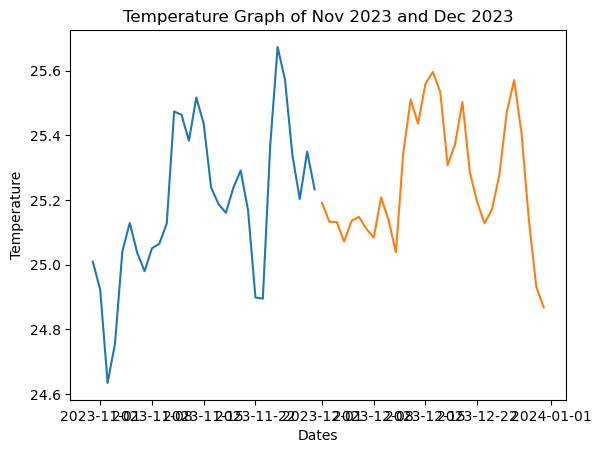

In [87]:
plt.title("Temperature Graph of Nov 2023 and Dec 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

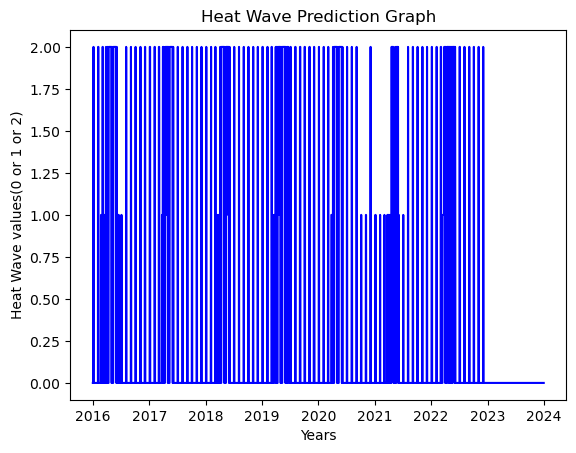

In [88]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [89]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-12-27,25.571207
2023-12-28,25.405388
2023-12-29,25.135481
2023-12-30,24.931031
2023-12-31,24.867883


In [90]:
print("The Average Mean Average Error across all 5 cities is:",1.7294)
print("The model fits the city of Khammam the best a we got the least AME value of",1.44896492)

The Average Mean Average Error across all 5 cities is: 1.7294
The model fits the city of Khammam the best a we got the least AME value of 1.44896492
